<a href="https://colab.research.google.com/github/rlrocha/paa/blob/main/ep5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Prático 5
Rafael Rocha

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time
import string
import random

## Árvore TRIE

In [12]:
class noTrie:
    
    # Trie node class
    def __init__(self):
        self.children = [None]*26
 
        # isEndOfWord is True if node represent the end of the word
        self.isEndOfWord = False
        
class arvoreTrie:
     
    # Trie data structure class
    def __init__(self):
        self.root = self.getNode()
 
    def getNode(self):
     
        # Returns new trie node (initialized to NULLs)
        return noTrie()
 
    def _charToIndex(self,ch):
         
        # private helper function
        # Converts key current character into index
        # use only 'a' through 'z' and lower case
         
        return ord(ch)-ord('a')
 
 
    def insert(self,key):
         
        # If not present, inserts key into trie
        # If the key is prefix of trie node,
        # just marks leaf node
        pCrawl = self.root
        length = len(key)
        for level in range(length):
            index = self._charToIndex(key[level])
 
            # if current character is not present
            if not pCrawl.children[index]:
                pCrawl.children[index] = self.getNode()
            pCrawl = pCrawl.children[index]
 
        # mark last node as leaf
        pCrawl.isEndOfWord = True
 
    def search(self, key):
         
        # Search key in the trie
        # Returns true if key presents
        # in trie, else false
        pCrawl = self.root
        length = len(key)
        for level in range(length):
            index = self._charToIndex(key[level])
            if not pCrawl.children[index]:
                return False
            pCrawl = pCrawl.children[index]
 
        return pCrawl.isEndOfWord

## Árvore PATRICIA

In [13]:
class noPatricia:

    def __init__(self, pos, val, prefixo):

        """
        Unidade basica
        :param int pos:
        :param str val:
        :param str prefixo:
        """

        self.filhos = [None, None]

        self.prefixo = prefixo
        
        self.pos = pos
        
        self.val = ord(val)

    def get(self, palavra):

        if palavra[:self.pos] != self.prefixo or len(palavra) <= self.pos: return 0

        valor = ord(palavra[self.pos])

        if valor <= self.val:

            return self.filhos[0]

        return self.filhos[1]


    def derivados(self):

        derivados = []

        for i in self.filhos:

            if type(i) == str: derivados.append(i[:-1])

            else: derivados += i.derivados()

        return derivados


    def __repr__(self):

        return "[{}|{}]".format(self.pos, chr(self.val))
    
class arvorePatricia:

    def __init__(self, raiz):

        """
        Inicia a árvore
        :param str raiz:
        """

        self.raiz = raiz + "$"


    def get_intersect(self, p1, p2):

        """
        Buca o ponto onde duas strings de diferenciam
        :param str p1:
        :param str p2:
        :return int:
        """
        for i in range(len(p1)):

            if len(p2) > i:

                if p1[i] != p2[i]: return i


    def insere(self, palavra):

        """
        Insere uma string na árvore
        :param str palavra:
        :return None:
        """

        # print("Inserindo %s" % palavra)

        if self.check(palavra):

            print("[Erro] Palavra já inserida")
            
            return

        palavra += '$'

        pai = None
        
        node = self.raiz
        
        i = 0

        while 1:

            # Caso nó folha

            if type(node) == str:

                pos = self.get_intersect(palavra, node)
                
                # Caso nó folha é raiz também

                if pai is None:

                    l = sorted([(ord(palavra[pos]), palavra), (ord(node[pos]),node)])
                    
                    self.raiz = noPatricia(pos, chr(l[0][0]), l[0][1][:pos])
                    
                    self.raiz.filhos = [k[1] for k in l]

                    return


                # Caso padrão

                else:

                    lado = pai.filhos.index(node)

                    l = sorted([(ord(palavra[pos]), palavra), (ord(node[pos]),node)])

                    pai.filhos[lado] = noPatricia(pos, chr(l[0][0]), l[0][1][:pos])
                    
                    pai.filhos[lado].filhos = [k[1] for k in l]

                    return



            else:

                prox = node.get(palavra)

                # Caso prefixo não combina

                if not prox:

                    pos = self.get_intersect(palavra, node.prefixo)

                    l = sorted([(ord(palavra[pos]), palavra), (ord(node.prefixo[pos]),node)])

                    # Caso raiz

                    if pai is None:

                        self.raiz = noPatricia(pos, chr(l[0][0]), palavra[:pos])

                        self.raiz.filhos = [k[1] for k in l]

                        return

                    else:

                        lado = pai.filhos.index(node)
                        
                        pai.filhos[lado] = noPatricia(pos, chr(l[0][0]), palavra[:pos])
                        
                        pai.filhos[lado].filhos = [k[1] for k in l]

                        return

                # Base de iteração

                else:

                    pai = node
                    
                    node = prox


    def check(self, palavra):

        palavra += '$'

        node = self.raiz

        while 1:

            if type(node) == str:

                return node == palavra

            next = node.get(palavra)
            
            if next:

                node = next

            else:

                return False


    def remove(self, palavra):

        if not self.check(palavra):

            print("[Erro] Palavra não encontrada")
            return

        palavra += '$'

        avo = None
        pai = None
        node = self.raiz

        while 1:

            if type(node) == str:

                if pai is None:

                    print("[Erro] Não é possível remover único item da arvore")
                    
                    return

                else:

                    pai.filhos.remove(node)
                    
                    novo_sucessor = pai.filhos[0]

                    if avo is None:

                        self.raiz = novo_sucessor
                        
                        del pai

                        return

                    else:

                        index = avo.filhos.index(pai)
                        
                        avo.filhos[index] = novo_sucessor
                        
                        del pai

                        return

            else:

                prox = node.get(palavra)

                if pai is None:

                    pai = node
                    
                    node = prox

                else:

                    avo = pai
                    
                    pai = node
                    
                    node = prox

    def derivados(self, prefixo):

        """
        Exibe folhas derivadas de determinado prefixo
        :param str prefixo:
        :return str[]:
        """

        tam = len(prefixo)
        
        node = self.raiz

        while 1:

            if type(node) == str:

                if node[:tam] == prefixo:

                    return [node[:-1]]

                else:

                    return []

            else:

                if node.prefixo == prefixo or node.prefixo[:tam] == prefixo:

                    return node.derivados()

                next = node.get(prefixo)

                if next:
                    
                    node = next
                    
                else:
                    
                    return []

## Geração de chaves aleatórias

In [14]:
def string_generator(M, N, P, prefix):
    """
    String Generator
    
    
    Parameters:
        M (int): Number of strings.
        N (int): Size of strings.
        P (int): Percentage of strings with same prefix
        prefix (str): Prefix of string.

    Returns:
        strings_list (list): Generated strings.

    """
    
    # Keys indexes that will have prefix
    prefix_pos = np.random.choice(np.arange(M), size=int(M*P/100), replace=False)
    
    strings_list = []
    
    for i in range(M):
        
        # Checks if key ith will have prefix
        if i in prefix_pos:
            key = prefix+''.join(random.choices(string.ascii_lowercase, k = N-len(prefix)))
            #key = prefix+''.join(random.choices(string.digits[0:2], k = N-len(prefix)))
        else:
            key = ''.join(random.choices(string.ascii_lowercase, k = N))
            #key = ''.join(random.choices(string.digits[0:2], k = N))
    
        strings_list.append(key)
    
    return strings_list

## Exemplo Árvore TRIE

In [15]:
M = 10 # Quantidade de chaves

N = 8 # Tamanho das chaves 

P = 50  # Porcentagem de chaves com o mesmo prefixo
prefixo = 'sgd' # Prefixo das chaves

chaves = string_generator(M, N, P, prefixo)

trie = arvoreTrie()
for i in range(M):
    
    chave = chaves[i]
    trie.insert(chave)

print('Chaves: ', chaves)
    
key = np.random.choice(chaves) # Elemento aleatório a ser buscado

saida = ['Chave não encontrada', 'Chave encontrada']
print("\n{} ---- {}".format(saida[trie.search(key)], key))

Chaves:  ['sgdkxwyz', 'sgdbrygm', 'sgdqvpzd', 'vundlhgc', 'sgdukdiq', 'cddywvtx', 'sgdhilmn', 'dqqttykr', 'lchjkeys', 'wegpdbkn']

Chave encontrada ---- sgdukdiq


## Exemplo Árvore PATRICIA

In [16]:
M = 10 # Quantidade de chaves

N = 8 # Tamanho das chaves 

P = 50  # Porcentagem de chaves com o mesmo prefixo
prefixo = 'sgd' # Prefixo das chaves

chaves = string_generator(M, N, P, prefixo)

for i in range(M):
    
    chave = chaves[i]
    
    if i==0:
        patricia = arvorePatricia(chave)
    else:
        patricia.insere(chave)
        
print('Chaves: ', chaves)
    
key = np.random.choice(chaves) # Elemento aleatório a ser buscado

saida = ['Chave não encontrada', 'Chave encontrada']
print("\n{} ---- {}".format(saida[patricia.check(key)], key))

Chaves:  ['hmdtcrcl', 'sgdjpabi', 'sgdoufxq', 'vuhrjvea', 'sgdykqqh', 'sgdlcpia', 'vkweqfou', 'sgdopjxn', 'wtvsufkm', 'emnnilvf']

Chave encontrada ---- emnnilvf


## Análise da Complexidade dos Algoritmos

### Análise 1

In [38]:
M_lista = np.arange(100, 10100, 100) # Quantidades de chaves

N = 10 # Tamanho das chaves 10, 50

P = 50  # Porcentagem de chaves com o mesmo prefixo 30,80
prefixo = 'sgd' # Prefixo das chaves SGD, ADAGRAD

In [39]:
T_trieInsert_lista1 = []
T_trieSearch_lista1 = []

T_patriciaInsert_lista1 = []
T_patriciaSearch_lista1 = []

for M in M_lista:
    
    chaves = string_generator(M, N, P, prefixo)
    
    trie = arvoreTrie()
    
    T_trieInsert = 0
    T_patriciaInsert = 0
    for i in range(M):
        
        chave = chaves[i]
        
        start_time = time.time()
        trie.insert(chave)
        T_trieInsert = T_trieInsert + time.time() - start_time # Tempo de execução Insert
        
        if i==0:
            start_time = time.time()
            patricia = arvorePatricia(chave)
            T_patriciaInsert = T_patriciaInsert + time.time() - start_time # Tempo de execução Insert
        else:
            start_time = time.time()
            patricia.insere(chave)
            T_patriciaInsert = T_patriciaInsert + time.time() - start_time # Tempo de execução Insert
    
    key = np.random.choice(chaves) # Elemento aleatório a ser buscado
    
    start_time = time.time()
    trie.search(key)
    t = time.time() - start_time
    
    T_trieSearch_lista1.append(t)
    
    start_time = time.time()
    patricia.check(key)
    t = time.time() - start_time
    
    T_patriciaSearch_lista1.append(t)
    
    T_trieInsert_lista1.append(T_trieInsert)
    T_patriciaInsert_lista1.append(T_patriciaInsert)

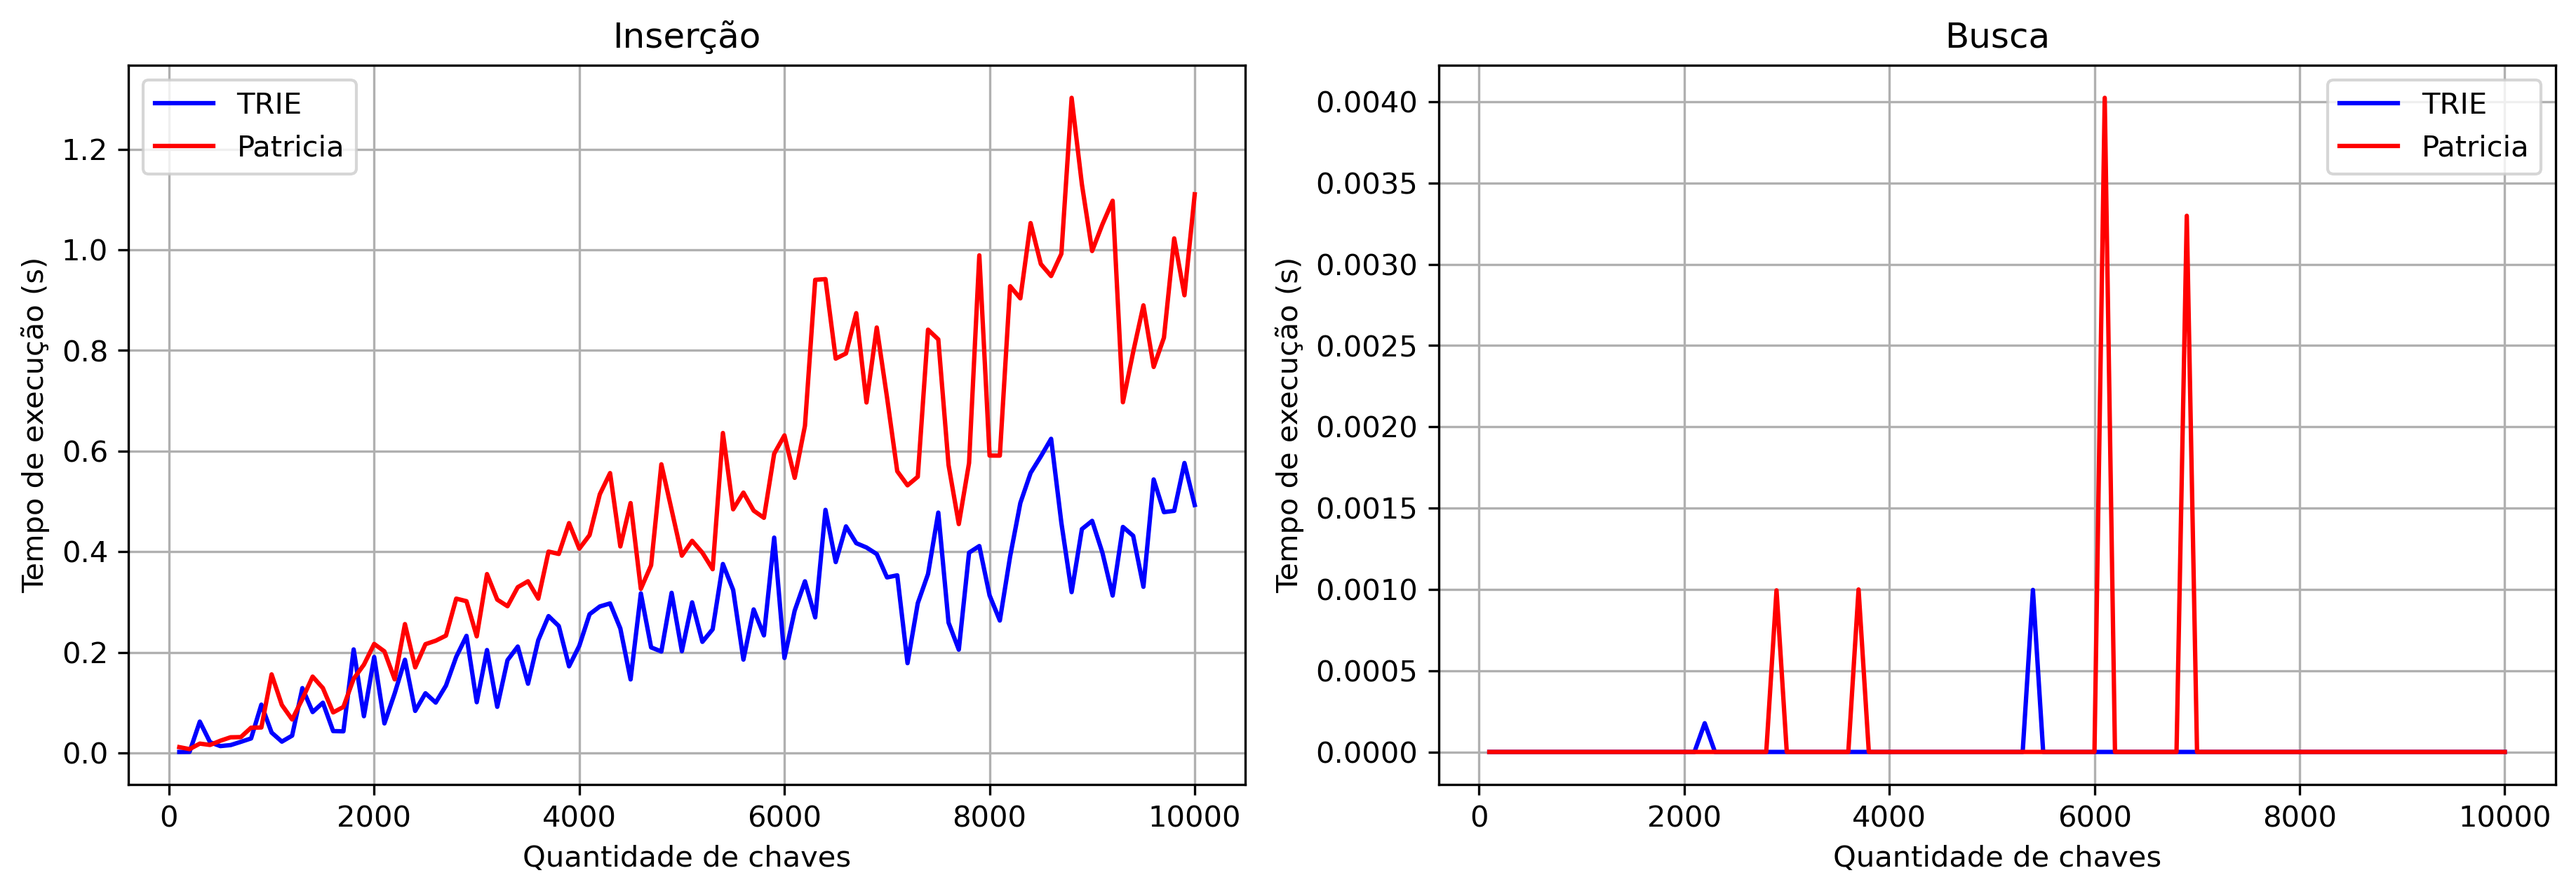

In [41]:
fig_luz, axes = plt.subplots(1,2, figsize=(8,4), dpi=300)
plt.tight_layout()

axes[0].plot(M_lista, T_trieInsert_lista1, color='blue')
axes[0].plot(M_lista, T_patriciaInsert_lista1, color='red')
axes[0].set_xlabel('Quantidade de chaves')
axes[0].set_ylabel('Tempo de execução (s)')
axes[0].set_title('Inserção')
axes[0].grid()
axes[0].legend(['TRIE', 'Patricia'])

axes[1].plot(M_lista, T_trieSearch_lista1, color='blue')
axes[1].plot(M_lista, T_patriciaSearch_lista1, color='red')
axes[1].set_xlabel('Quantidade de chaves')
axes[1].set_ylabel('Tempo de execução (s)')
axes[1].set_title('Busca')
axes[1].grid()
axes[1].legend(['TRIE', 'Patricia'])

plt.subplots_adjust(right=1.5)

#plt.savefig('resultados/ep5/ep5_analise1.png', dpi=300, bbox_inches = 'tight')
plt.show()

### Análise 2

In [42]:
M_lista = np.arange(100, 10100, 100) # Quantidades de chaves

N = 50 # Tamanho das chaves

P = 80  # Porcentagem de chaves com o mesmo prefixo
prefixo = 'adagrad' # Prefixo das chaves

In [43]:
T_trieInsert_lista2 = []
T_trieSearch_lista2 = []

T_patriciaInsert_lista2 = []
T_patriciaSearch_lista2 = []

for M in M_lista:
    
    chaves = string_generator(M, N, P, prefixo)
    
    trie = arvoreTrie()
    
    T_trieInsert = 0
    T_patriciaInsert = 0
    for i in range(M):
        
        chave = chaves[i]
        
        start_time = time.time()
        trie.insert(chave)
        T_trieInsert = T_trieInsert + time.time() - start_time # Tempo de execução Insert
        
        if i==0:
            start_time = time.time()
            patricia = arvorePatricia(chave)
            T_patriciaInsert = T_patriciaInsert + time.time() - start_time # Tempo de execução Insert
        else:
            start_time = time.time()
            patricia.insere(chave)
            T_patriciaInsert = T_patriciaInsert + time.time() - start_time # Tempo de execução Insert
    
    key = np.random.choice(chaves) # Elemento aleatório a ser buscado
    
    start_time = time.time()
    trie.search(key)
    t = time.time() - start_time
    
    T_trieSearch_lista2.append(t)
    
    start_time = time.time()
    patricia.check(key)
    t = time.time() - start_time
    
    T_patriciaSearch_lista2.append(t)
    
    T_trieInsert_lista2.append(T_trieInsert)
    T_patriciaInsert_lista2.append(T_patriciaInsert)

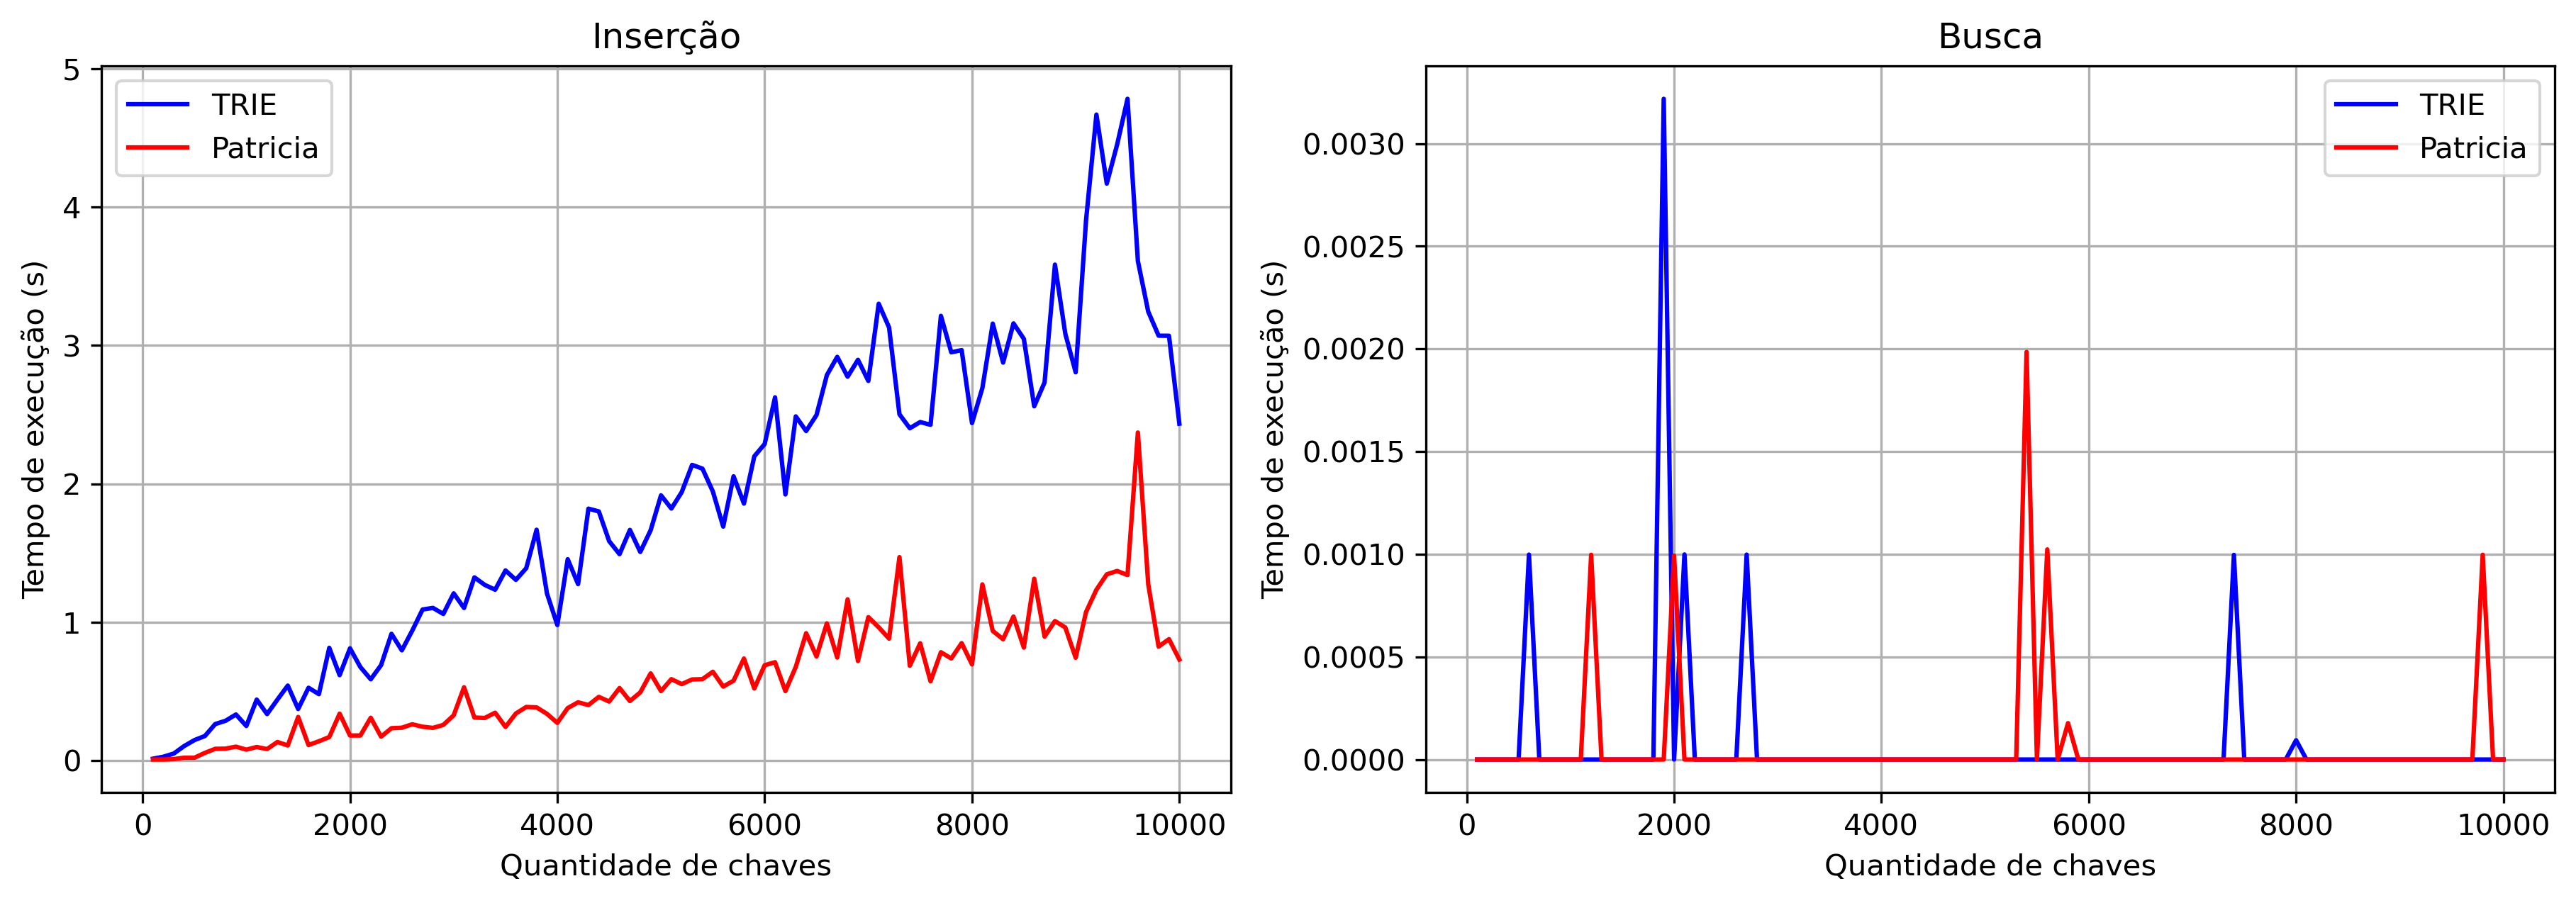

In [47]:
fig_luz, axes = plt.subplots(1,2, figsize=(8,4), dpi=300)
plt.tight_layout()

axes[0].plot(M_lista, T_trieInsert_lista2, color='blue')
axes[0].plot(M_lista, T_patriciaInsert_lista2, color='red')
axes[0].set_xlabel('Quantidade de chaves')
axes[0].set_ylabel('Tempo de execução (s)')
axes[0].set_title('Inserção')
axes[0].grid()
axes[0].legend(['TRIE', 'Patricia'])

axes[1].plot(M_lista, T_trieSearch_lista2, color='blue')
axes[1].plot(M_lista, T_patriciaSearch_lista2, color='red')
axes[1].set_xlabel('Quantidade de chaves')
axes[1].set_ylabel('Tempo de execução (s)')
axes[1].set_title('Busca')
axes[1].grid()
axes[1].legend(['TRIE', 'Patricia'])

plt.subplots_adjust(right=1.5)

#plt.savefig('resultados/ep5/ep5_analise2.png', dpi=300, bbox_inches = 'tight')
plt.show()